# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    size_arg = size
    degrees = np.linspace(1, precision, precision)
    degrees = (1/2) ** degrees
    size_updated = []
    if (isinstance(size_arg, int)):
      size_updated = np.array([size_arg])
    else:
      size_updated = np.array(size_arg)
    big_size = int(np.prod(size_updated))
    array = coin(size=int(precision*big_size))
    size_updated = np.append(size_updated, precision)
    matrix = array.reshape(size_updated)
    matrix_of_degrees = np.array([degrees] * big_size)
    matrix_of_degrees = matrix_of_degrees.reshape(size_updated)
    rs = matrix * matrix_of_degrees
    rs = rs.sum(axis=len(size_updated) - 1)
    return rs


def plot_uniform_density(size=200):
    unfrm = uniform((1, size), 3)
    unfrm = unfrm[0]
    plt.figure()
    plt.scatter(unfrm, np.zeros(size), alpha=0.4)
    plt.hist(unfrm, alpha=0.4, bins=10, density=True, label="Выборка")
    grid = np.linspace(-0.25, 1.25, 500)  
    unfrm_pdf = uniform_pdf(grid)
    plt.plot(grid, unfrm_pdf, label="Плотность")
    plt.title('График плотности равномерного распределения $\mathcal{U}(0, 1)$ и гистограмма сгенерированной выборки')
    plt.grid()
    plt.legend(fontsize=10)
    plt.xlabel('Носитель')
    plt.ylabel('Плотность')
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    fig = plt.figure(figsize=(15,3))

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        # plt.<определите подграфик>(3, 2, i + 1)
        ax = fig.add_subplot(3, 2, i + 1)

        # plt.<функция отрисовки точек>(
        #   <Сгенерируйте выборку размера size точности precision>,
        #   np.zeros(size),
        #   <прозрачность точки равна 0.4>
        # )
        ax.scatter(x=uniform((1, size), precision), y=np.zeros(size), alpha=0.4, label=str(precision))
        plt.legend(fontsize=7, loc='best')
        plt.xlabel('Носитель', fontsize=7)
        plt.ylabel('Плотность', fontsize=7)
        plt.yticks([])
        if i < 4:
            plt.xticks([])
          
    plt.suptitle('Графики распределений значений случайных величин с распределением $\mathcal{U}(0, 1)$, при различныхых значениях precision', y=1.05)
    plt.tight_layout()
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    unfrm1 = uniform(size, precision)
    unfrm2 = uniform(size, precision)
    #Используем формулу из презентации по лекции
    res = loc + scale * (np.cos(unfrm1 * 2 * np.pi) * (-2 * np.log(unfrm2))**(1/2))
    return res


def plot_normal_density(size=200):
    nrml = normal(size, 0, 1)
    plt.figure()
    plt.scatter(nrml, np.zeros(size), alpha=0.4)
    plt.hist(nrml, alpha=0.4, bins=10, density=True, label="Выборка")
    grid = np.linspace(-3, 3, 500)  
    nrml_pdf = norm_pdf(grid)
    plt.plot(grid, nrml_pdf, label="Плотность")
    plt.title('График плотности нормального распределения $\mathcal{N}(0, 1)$ и гистограмма сгенерированной выборки')
    plt.grid()
    plt.legend()
    plt.xlabel('Носитель')
    plt.ylabel('Плотность')
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    unfrm = uniform(size, precision)
    #Используем функцию, обратную функции распределения
    res = (1 / lambd) * np.log(1 / (1 - unfrm))
    return res


def plot_expon_density(size=100):
    expn = expon(size, 1)
    plt.figure()
    plt.scatter(expn, np.zeros(size), alpha=0.4)
    plt.hist(expn, alpha=0.4, bins=10, density=True, label="Выборка")
    grid = np.linspace(-0.5, 5, 500)  
    expn_pdf = expon_pdf(grid)
    plt.plot(grid, expn_pdf, label="Плотность")
    plt.title('График плотности экспоненциального распределения $Exp(1)$ и гистограмма сгенерированной выборки')
    plt.grid()
    plt.legend()
    plt.xlabel('Носитель')
    plt.ylabel('Плотность')
    return plt.gcf()


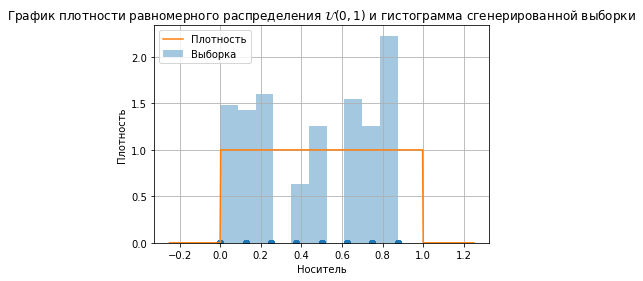

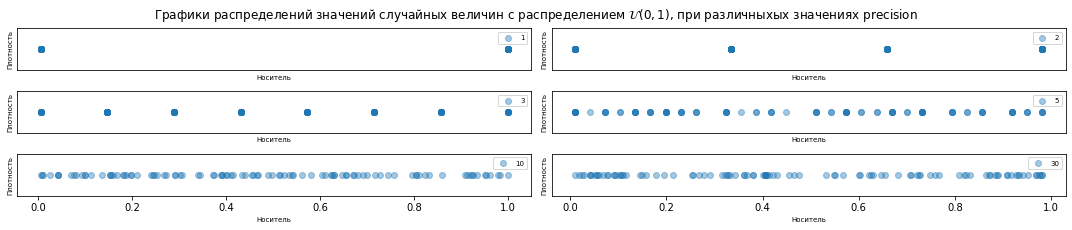

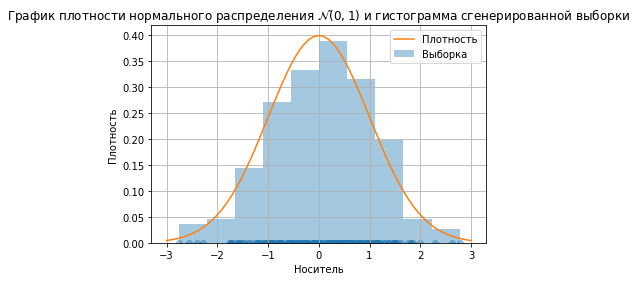

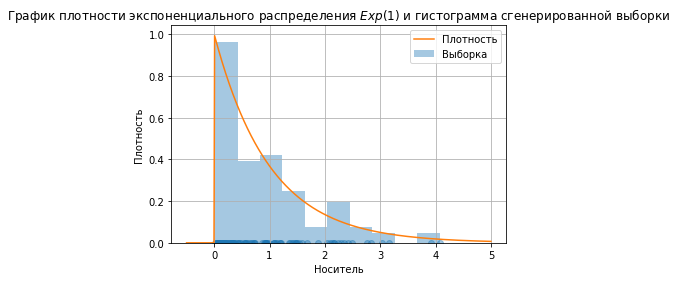

In [ ]:
plot_uniform_density();
plot_uniform_different_precision();
plot_normal_density();
plot_expon_density();

**Выводы:**

*0) эксперимент показал, что, как и ожидалось, во всех трёх случаях почти все значения распределений оказались в тех частях графика, где соответствующие функции плотностей распределений принимают наибольшие свои значения.*


*1) показано (см. "График плотности равномерного распределения $\mathcal{U}(0, 1)$ и гистограмма сгенерированной выборки"), что плотность равномерного распределения равна 1 на [0; 1] и равна нулю на остальной области определения (-0,25, 1,25); при этом в сгенерированном наборе значений не оказалось значений (и теоретически не могло оказаться), столбцы которых в гистограмме вышли бы за пределы [0; 1].*

*2) показано (см. "Графики распределений значений случайных величин с распределением $\mathcal{U}(0, 1)$, при различныхых значениях precision"), что точки выборки равномерно распределяются по отрезку [0; 1]. При этом, при малых (1, 2, 3) значениях параметра precision (который показывает, до какого количества значащих цифр после запятой генерируются числа выборки) числа выборки "концентрируются" на небольшом количестве точек, равномерно расбросанных по отрезку [0; 1]. Например, при precision=1 есть только ровно две очень густо закрашенные точки - в 0 и 1, в которые попали все имеющиеся значения. При больших (5, 10, 30) значениях precision на графиках имеется большое количество не густо (по сравнению с густотой окраски точек при малых значениях precision) закрашенных точек, (почти) равномерно распределённых по отрезку [0; 1]. Т.е. при больших precision значений много, они (почти) равномерно покрывают отрезок [0; 1], и каждое из них встречается нечасто.*

*3) показано (см. "График плотности нормального распределения $\mathcal{N}(0, 1)$ и гистограмма сгенерированной выборки"), что плотность $\mathcal{N}(0, 1)$ принимает максимальное значение в 0, а при x → +- ∞ - убывает, и симметрична относительно оси OY. Значения в выборке распределены в соответствии с плотностью - на промежутке (-3; 3) значение встречается тем чаще, чем оно ближе к центру, в окрестности центра расположен "сгусток" точек, по краям видны одиночные негусто закрашенные точки.*

*4) показано (см. "График плотности экспоненциального распределения $\mathcal{\varepsilon}(1)$ и гистограмма сгенерированной выборки"), что плотность имеет точку разрыва в нуле; здесь же принимает максимальное значение. На x < 0 плотность нулевая, при x → + ∞ плотность быстро убывает. Значения выборки распределены в соответствии с плотностью - точек на x < 0 нет, в нуле и его правой окрестности виден "сгусток" точек - здесь точек больше всего, с ростом x точки встречаются реже.* 

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

*$\mathcal{C}(x_0, δ)$ - распределение Коши, где $x_0$ - параметр сдвига, $δ$ - параметр масштаба.*

*Будем строить графики стандартных распределений нормального и Коши (т.е. и то, и то с параметрами (0,1)).*

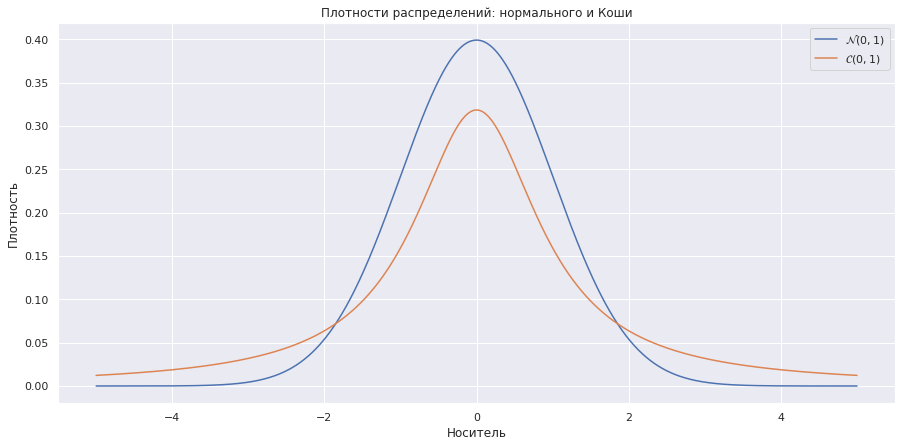

In [2]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

plt.figure(figsize=(15, 7))
grid = np.linspace(-5, 5, 1500)

#Строим график нормального распределения
nrml = sps.norm(loc=0, scale=1).pdf(grid)
plt.plot(grid, nrml, label=r"$\mathcal{N}(0, 1)$")

#Строим график распределения Коши
cchy = sps.cauchy(loc=0, scale=1).pdf(grid)
plt.plot(grid, cchy, label="$\mathcal{C}(0, 1)$")


plt.title("Плотности распределений: нормального и Коши")
plt.legend()
plt.xlabel('Носитель')
plt.ylabel('Плотность')
plt.show()


*Видно, что наибольшие значения обоих распределений достигаются в центре промежутка определения - в нуле. В нуле и его окрестности (радиусом немного меньше 2) плотность нормального распределения имеет бОльшие значения, чем плотность распределения Коши. На оставшейся части области определения плотность распределения Коши, наоборот, больше плотности нормального распределения. Неформально, это говорит о том, что вблизи нуля функция нормального распределения изменяется быстрее функции распределения Коши, а вдали от нуля - наоборот. В терминах вероятностей вышесказанное означает, что вероятность того, что случайная величина ξ принимает значение, близкое среднему, больше, если ξ ∼ $\mathcal{N}(0, 1)$, чем если ξ ∼ $\mathcal{C}(0, 1)$.*

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

*Проверим ЗБЧ для распределения коши $\mathcal{C}(0, 1)$. 10 раз независимо сгенерируем выборку, посчитаем среднее, построим график.*

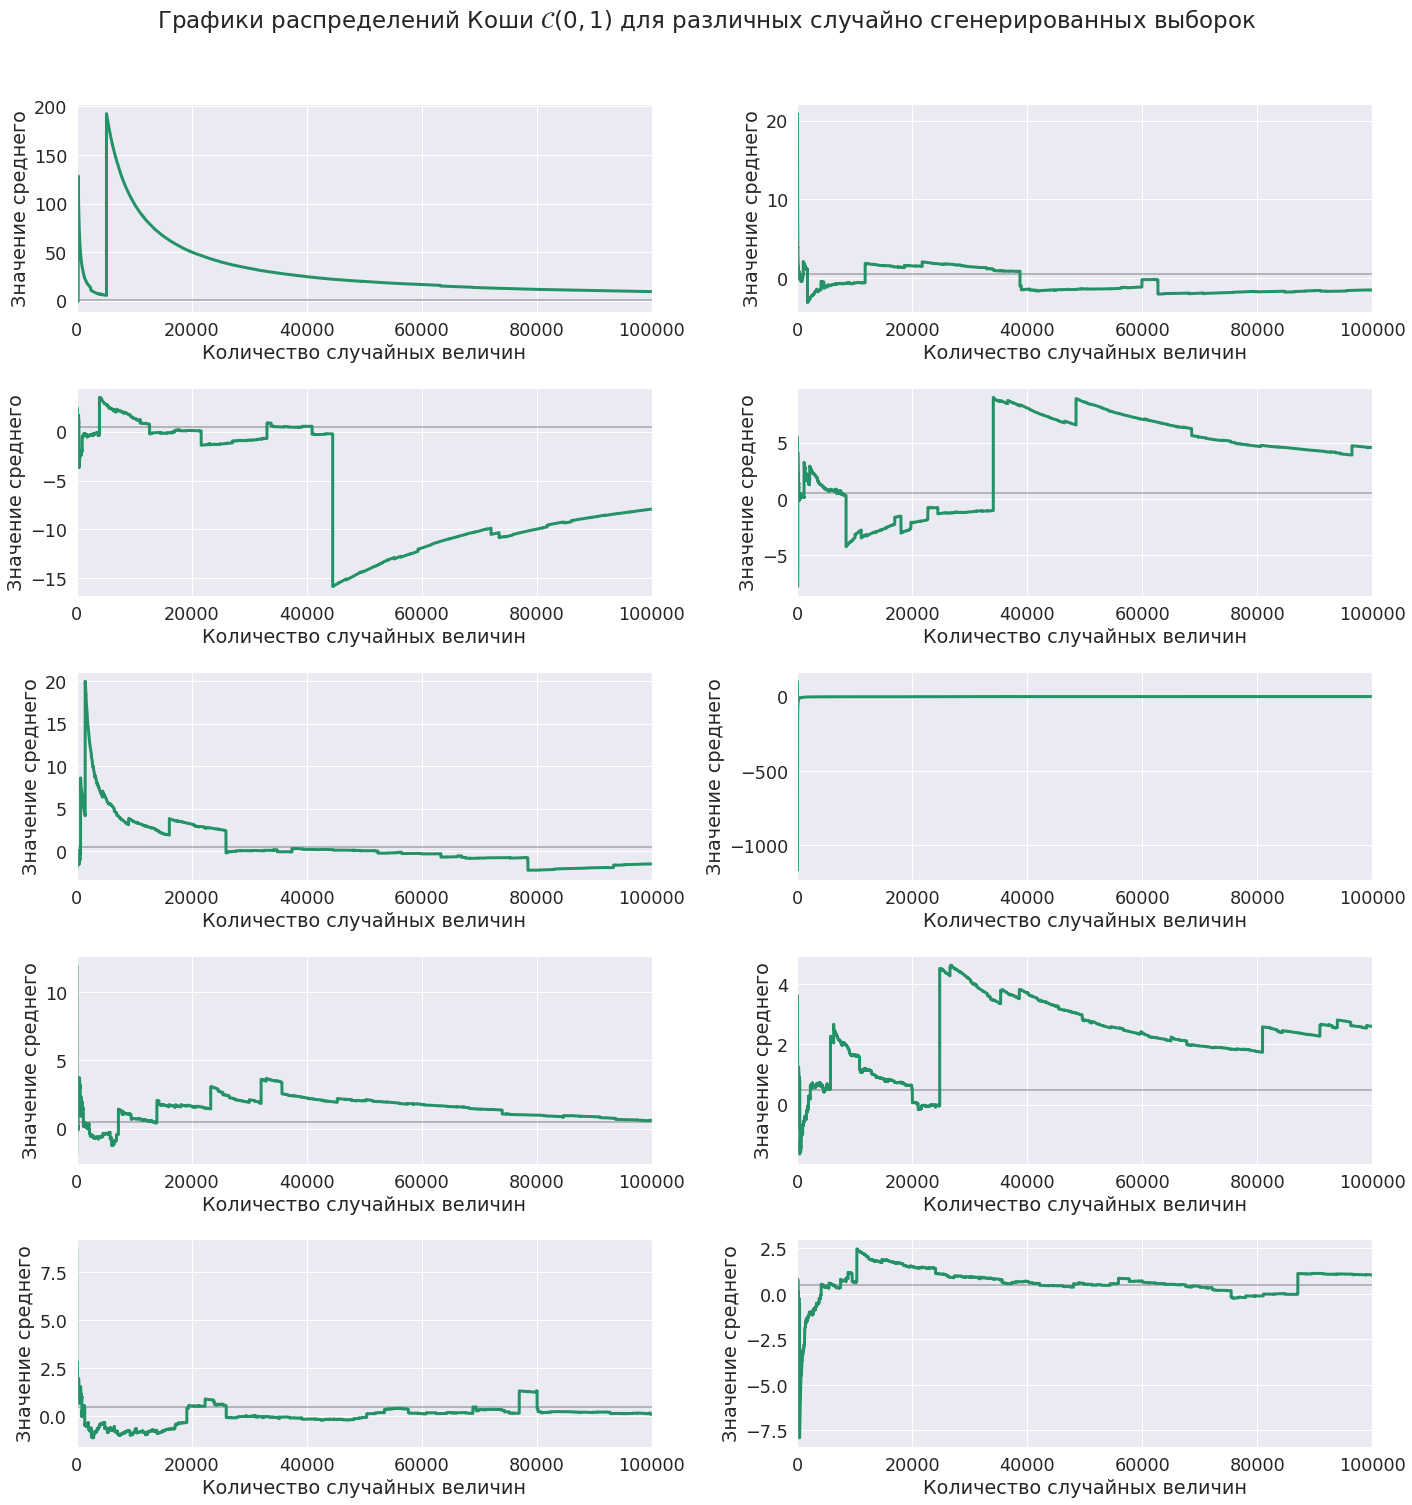

In [ ]:
sns.set(font_scale=1.6, palette='summer')

size = 100000

plt.figure(figsize=(20, 20))

for i in range(10):

    # Генерируем выборку, посчитаем среднее
    samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # Построим график
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.suptitle('Графики распределений Коши $\mathcal{C}(0, 1)$ для различных случайно сгенерированных выборок', y=1.05)
plt.tight_layout()


*Видим, что графики ведут себя по-разному и явная сходимость к какому-либо значению видна не везде.*

*Теперь отразим визуализацию предыдущего эксперимента на одном графике сразу для большого числа выборок. Для этого сгенерируем большое количество независимых наборов слуайных величин с распределением Коши, а затем нарисуем их на графике одним цветом.*

In [ ]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
size = 100000  # количество случайных величин
samples_count = 500  # количество выборок

#Генерируем выборки
samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Text(0.5, 1.0, 'Зависимость значения выборочного среднего от размера выборки для 500 различных случайно сгенерированных выборок с распределением Коши $\\mathcal{C}(0, 1)$')

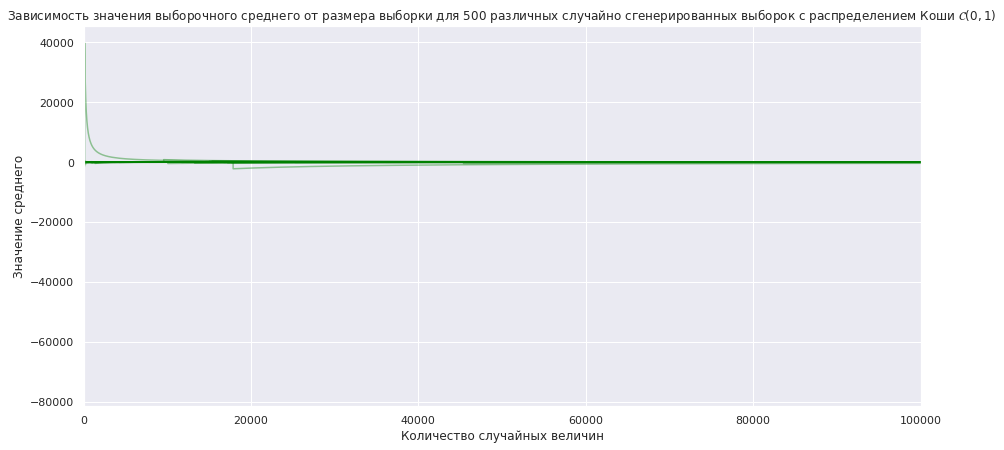

In [ ]:
sns.set(palette='summer')

#Строим график
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.4)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.title('Зависимость значения выборочного среднего от размера выборки для 500 различных случайно сгенерированных выборок с распределением Коши $\mathcal{C}(0, 1)$')


*Видим отклонения от линии y=0, не везде видна сходимость к среднему. Можно сделать вывод, что ЗБЧ не выполняется. Это не противоречит формулировке ЗБЧ из лекции (https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html), т.к. для того, чтобы это формулировка имела смысл, необходимо существование математического ожидания случайной величины, а для распределения Коши математическое ожидание полагается неопределённым.*

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

*Повторим действия прошлого эксперимента, считая вместо кумулятивных сумм кумулятивные медианы.*

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **

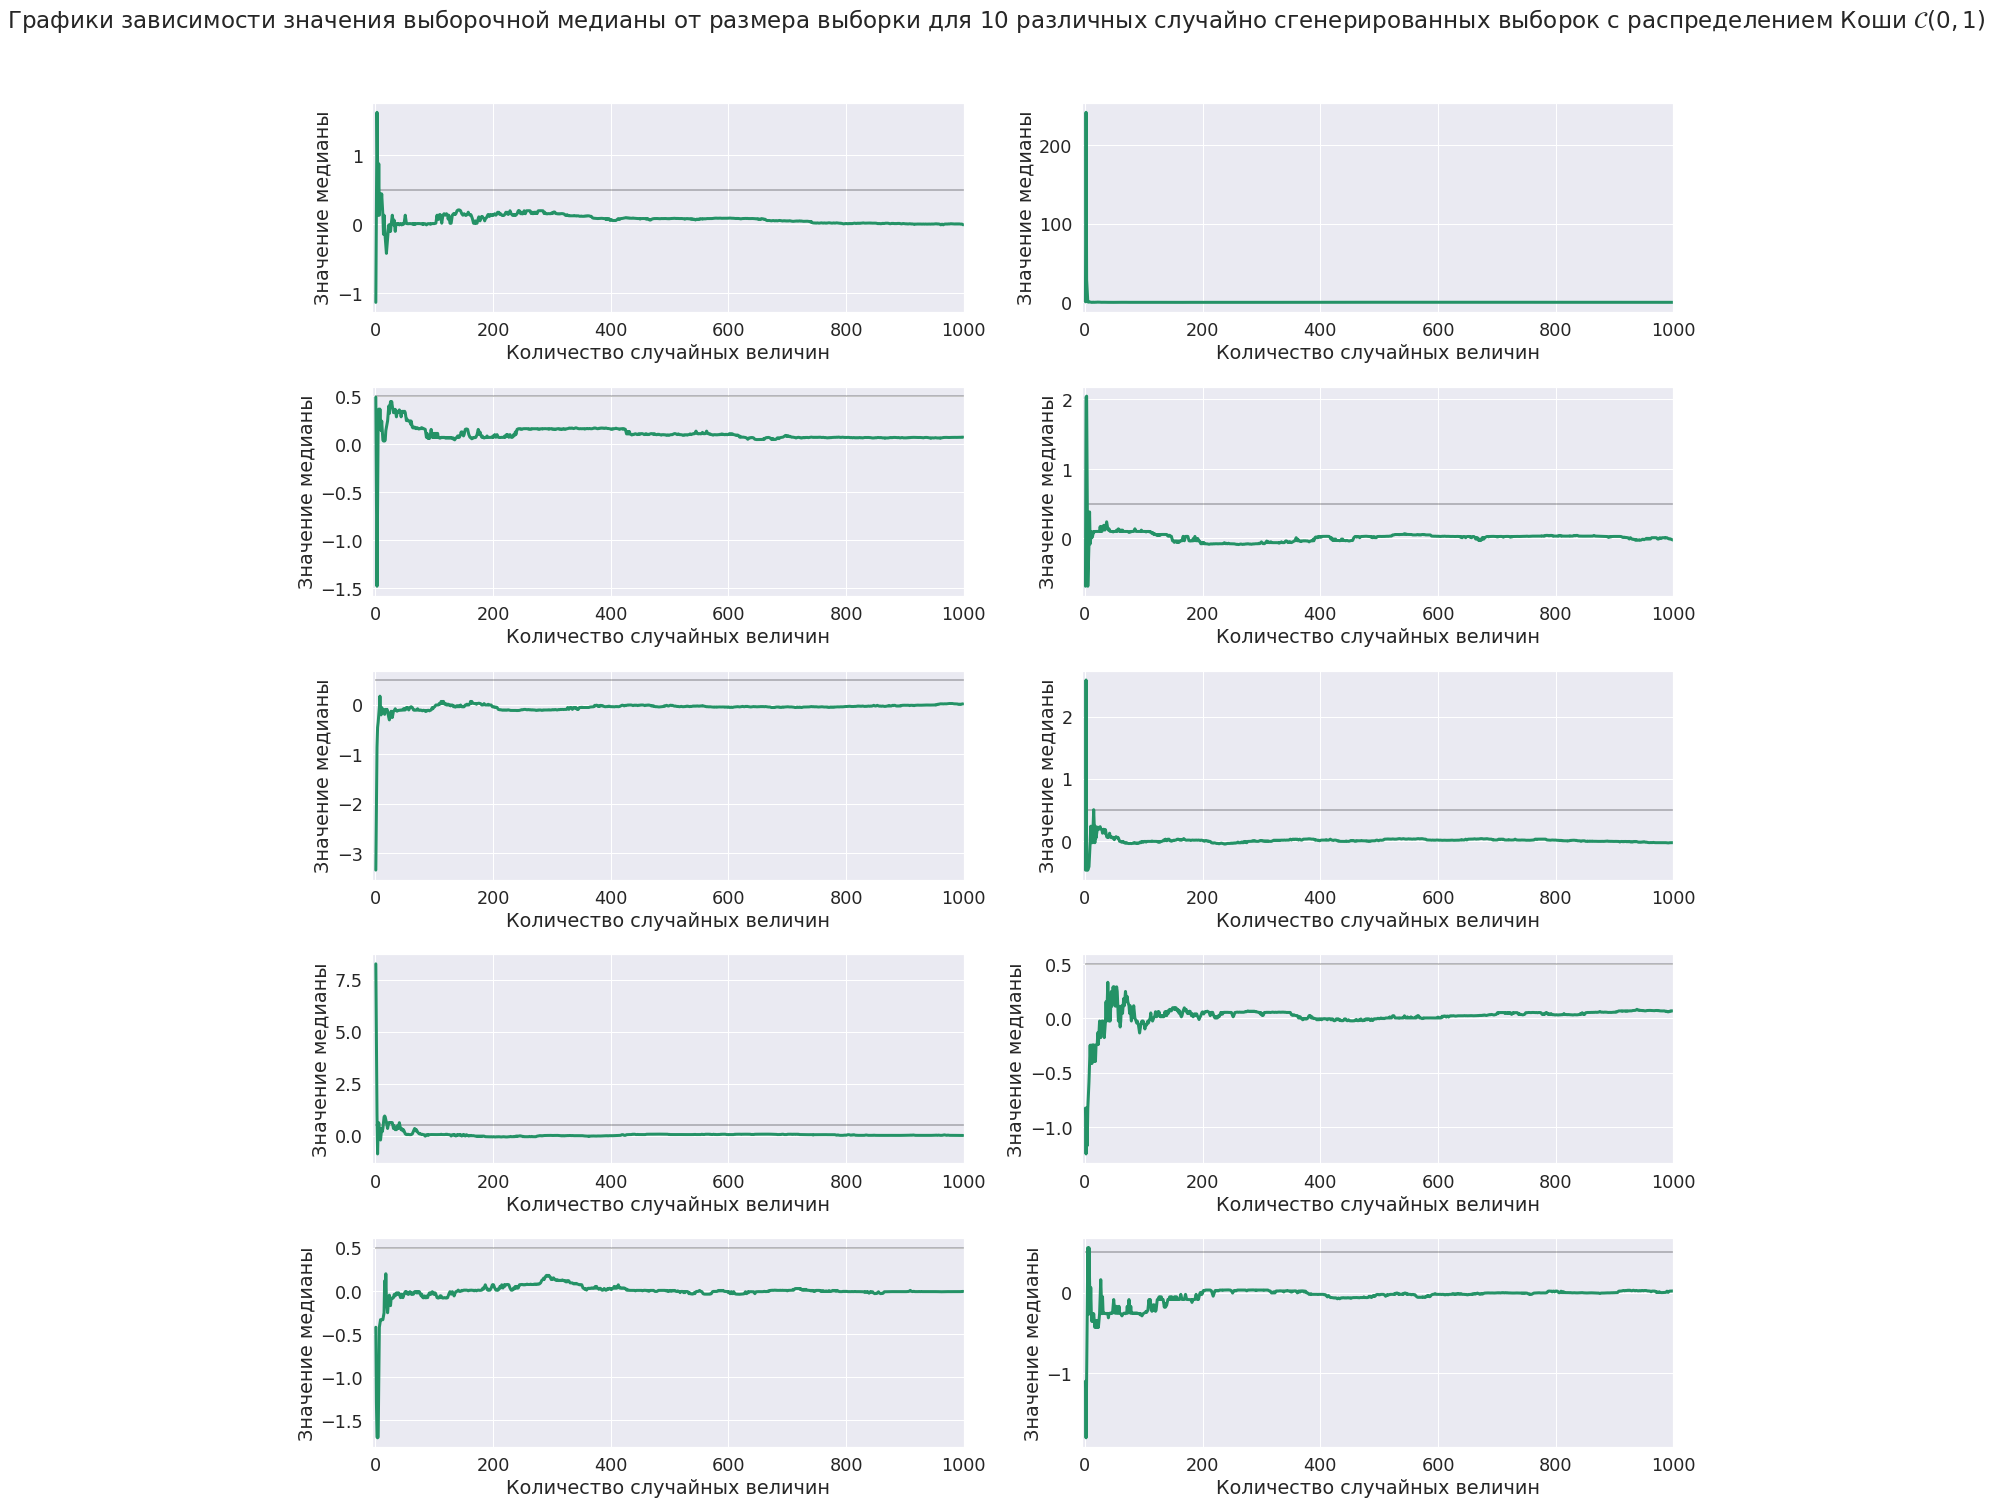

In [ ]:
sns.set(font_scale=1.6, palette='summer')

size = 1000 #размер выборки

plt.figure(figsize=(20, 20))

#Считаем кумулятивные медианы
for i in range(10):

    # Генерируем выборку, посчитаем медиану
    samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
    mdn = np.array([])
    for j in range(len(samples)):
      mdn = np.append(mdn, np.median(samples[0:j]))

    # Построим график
    plt.subplot(5, 2, i+1)
    plt.plot(mdn, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))
    
plt.suptitle('Графики зависимости значения выборочной медианы от размера выборки для 10 различных случайно сгенерированных выборок с распределением Коши $\mathcal{C}(0, 1)$', y=1.05)
plt.tight_layout()

*Теперь повторим эксперимент для большего числа выборок и отобразим результаты на одном графике.*

In [ ]:
from numpy.ma.core import transpose
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

#Генерируем выборки
samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))

transposed_samples = samples.T
mdn = np.array([])

#Считаем кумулятивные медианы
for j in range(size):
  vector = np.median(transposed_samples[0:j + 1], axis=0)
  mdn = np.append(mdn, vector)

mdn = mdn.reshape(size, samples_count)
mdn = mdn.T


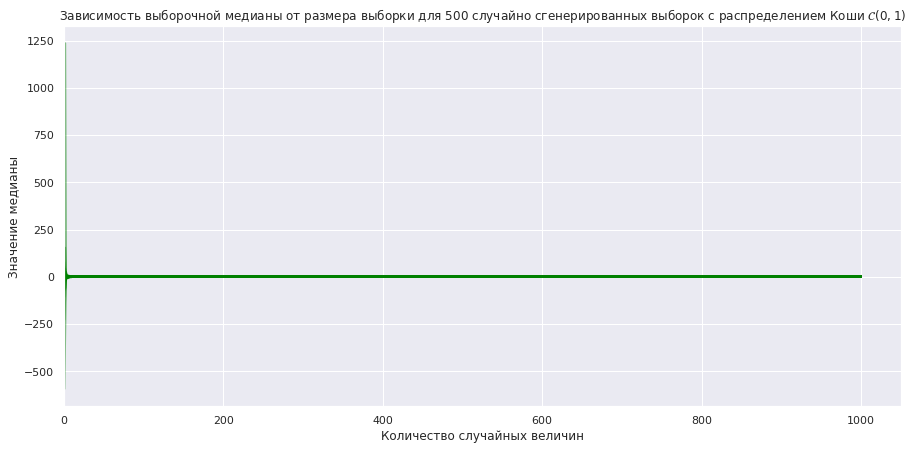

In [ ]:
#Строим график
sns.set(palette='summer')

plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, mdn[i], color='green', alpha=0.5)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim(0,)
plt.title('Зависимость выборочной медианы от размера выборки для 500 случайно сгенерированных выборок c распределением Коши $\mathcal{C}(0, 1)$')
plt.show()

*Попробуем ограничить x чтобы увидеть, что происходит в окрестности нуля.*

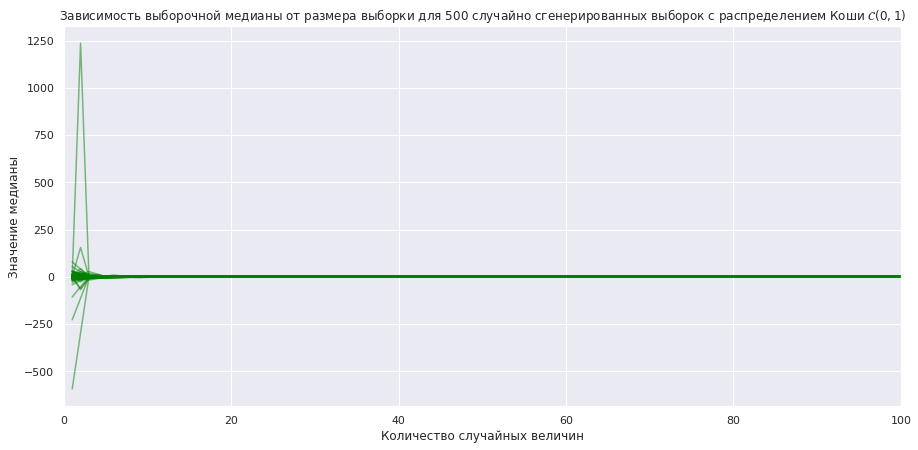

In [ ]:
sns.set(palette='summer')

plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, mdn[i], color='green', alpha=0.5)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim(0, 100)
plt.title('Зависимость выборочной медианы от размера выборки для 500 случайно сгенерированных выборок c распределением Коши $\mathcal{C}(0, 1)$')
plt.show()

*Здесь чётко видна сходимость к среднему.*

**Вывод:**

1) для распределения Коши не выполняется ЗБЧ - см. "Зависимость значения выборочного среднего от размера выборки для 500 различных случайно сгенерированных выборок c распределением Коши"; в то же время, сходимость выполняется для функции медианы на множестве выборок, распределённых по Коши $\mathcal{C}(0, 1)$.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [ ]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

a = 0.5

size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

#Генерируем выборки
samples = sps.bernoulli(a).rvs(size=(samples_count, size))

#Считаем выборочные средние
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

#Считаем |S_nj - a| для всех n и j (в ячейке (i, j) находится S_ji)
cnb = np.where(cum_means - a >= 0, cum_means - a, a - cum_means)

#Считаем суммы подулей по j для фиксированного n
F = np.sum(cnb, axis=0) / samples_count

#Найдём n, начиная с которого F принимает значения, не большие 0.02
ns = np.arange(size) + 1

#good_n - искомый n, т.е. наименьший, при котором функция F не превосходит 0.02
good_n = np.min(np.argwhere(F <= 0.02))
#напечатаем good_n
print(good_n)


386


*Построим требуемые графики. На всех графиках зависимости функции F от длины выборки, которые будут далее, голубыми точечными линиями обозначены наименьшие значения n, при которых F(n) стала не больше 0.02. Красными прерывистыми линиями обозначены соответствующие значения F.*

*Линейный график:*

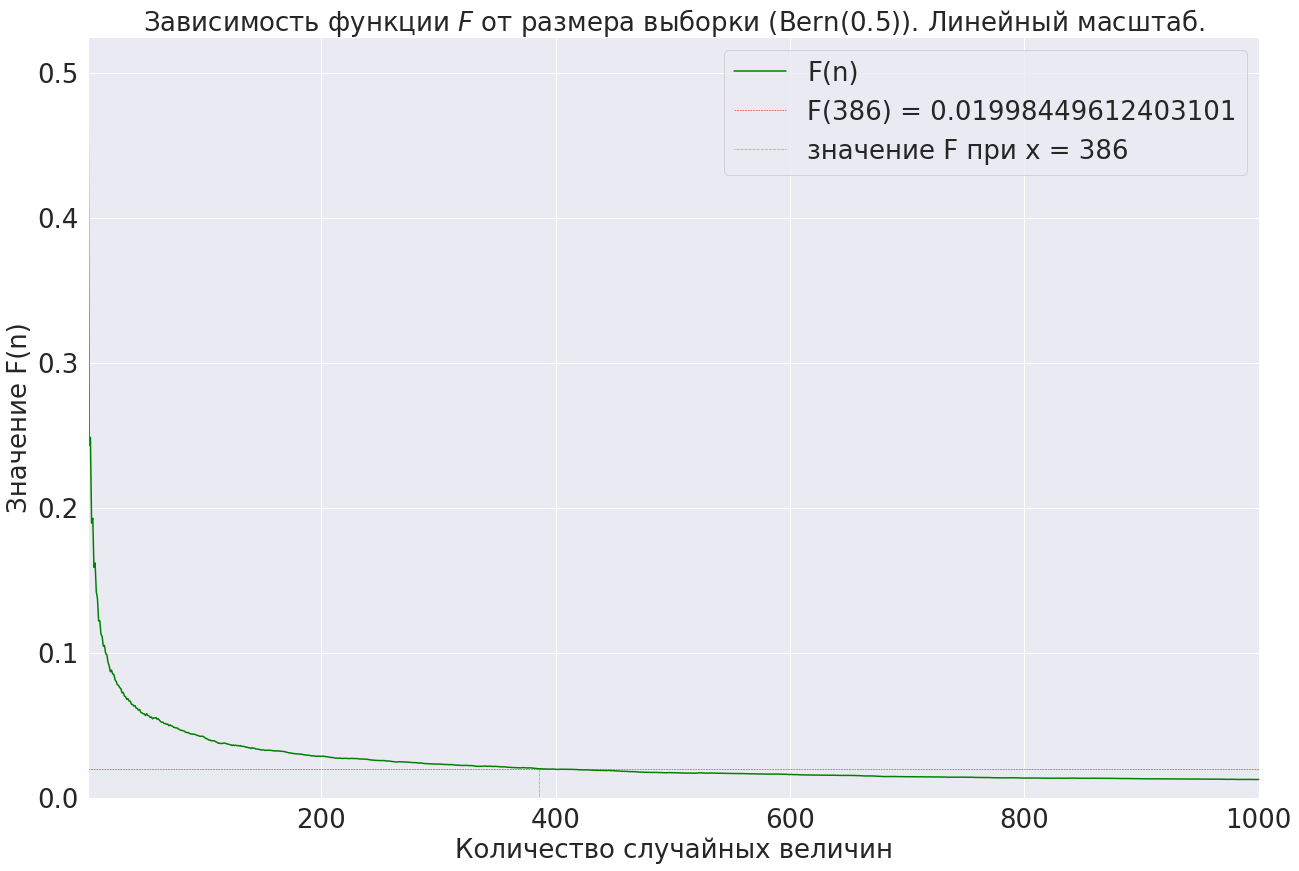

In [ ]:
sns.set(palette='summer')

plt.figure(figsize=(21, 14))

plt.plot(np.arange(size) + 1, F, color='green', alpha=1, label='F(n)')
plt.hlines(F[good_n], 1, size, label=f'F({good_n}) = {F[good_n]}', lw=0.5, linestyle='--', colors='red')
plt.vlines(good_n, 0, F[good_n], label=f'значение F при x = {good_n}', lw=0.5, linestyle=':', colors='blue')

plt.xlabel('Количество случайных величин', fontsize=26)
plt.ylabel('Значение F(n)', fontsize=26)
plt.legend(prop={'size':26})
plt.tick_params(axis='both', which='major', labelsize=26)
plt.xlim(1,size + 1)
plt.ylim(0,)
plt.title("Зависимость функции $F$ от размера выборки (Bern($0.5$)). Линейный масштаб.", fontsize=26)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


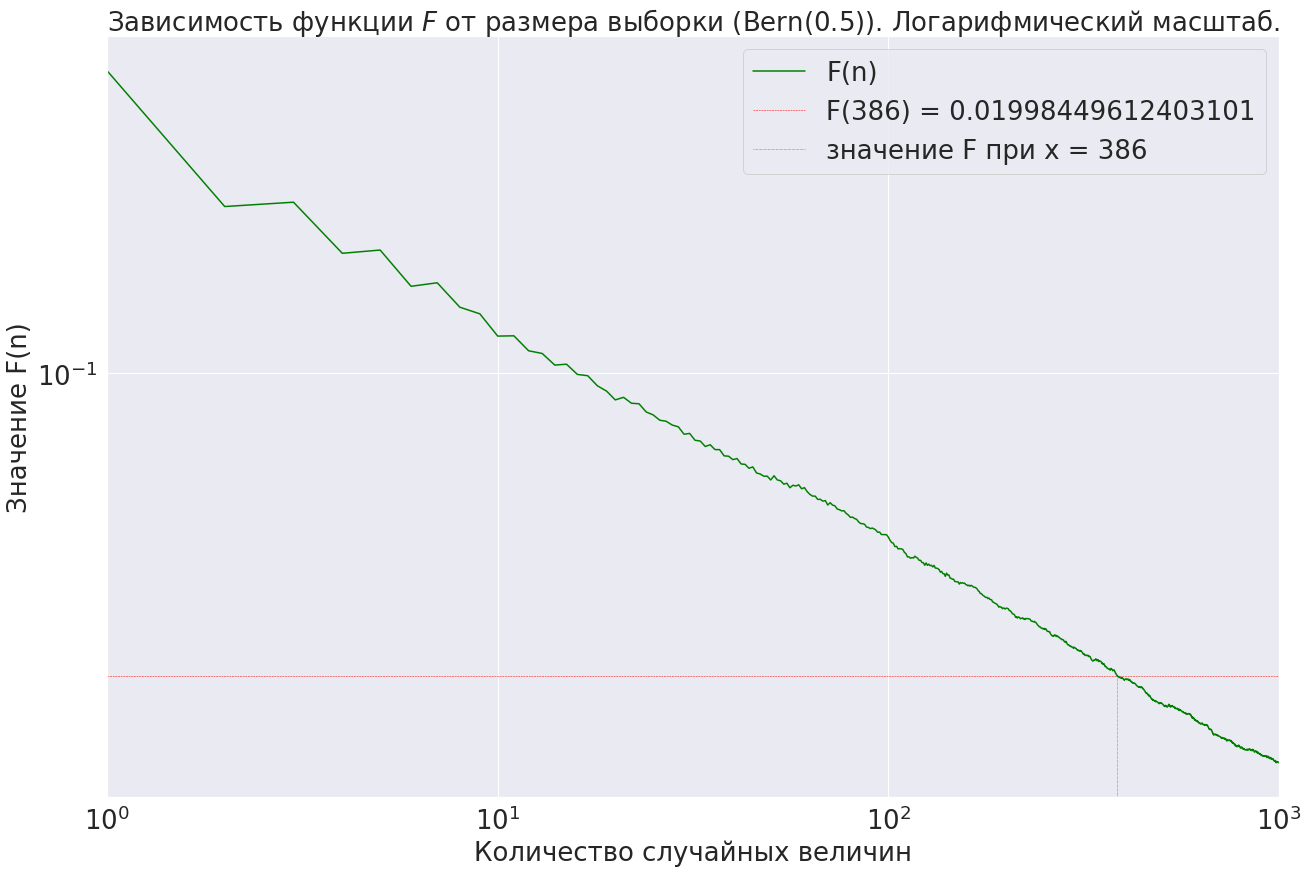

In [ ]:
sns.set(palette='summer')

plt.figure(figsize=(21, 14))

plt.plot(np.arange(size) + 1, F, color='green', alpha=1, label='F(n)')
plt.hlines(F[good_n], 1, size, label=f'F({good_n}) = {F[good_n]}', lw=0.5, linestyle='--', colors='red')
plt.vlines(good_n, 0, F[good_n], label=f'значение F при x = {good_n}', lw=0.5, linestyle=':', colors='blue')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Количество случайных величин', fontsize=26)
plt.ylabel('Значение F(n)', fontsize=26)
plt.legend(prop={'size':26})
plt.tick_params(axis='both', which='major', labelsize=26)
plt.xlim(1,size + 1)
plt.ylim(0,)
plt.title("Зависимость функции $F$ от размера выборки (Bern($0.5$)). Логарифмический масштаб.", fontsize=26)
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [ ]:
sns.set(font_scale=1.6, palette='summer')

size = 1000

good_n_s = np.array([])
max_arg = 0

for big_a in range(5, 100, 5):
    a = big_a / 100
    samples_count = 500  # количество выборок

    #Генерируем выборки
    samples = sps.bernoulli(a).rvs(size=(samples_count, size))

    #Считаем выборочные средние
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    #Считаем |S_nj - a| для всех n и j (в ячейке (i, j) находится S_ji)
    cnb = np.where(cum_means - a >= 0, cum_means - a, a - cum_means)

    #Считаем суммы подулей по j для фиксированного n
    F = np.sum(cnb, axis=0) / samples_count

    #Найдём n, начиная с которого F принимает значения, не большие 0.02
    ns = np.arange(size) + 1

    good_n = np.min(np.argwhere(F <= 0.02))
    if (big_a > 5):
      if (good_n >= np.max(good_n_s)):
        max_arg = a
    good_n_s = np.append(good_n_s, good_n)

*Визуализируем зависимость размера выборки, необходимого для остижения F <= 0.02, от параметра a.*

Text(0.5, 1.0, 'Зависимость размера выборки, необходимого для достижения точности $0.02$, от параметра $a$ распределения Бернулли')

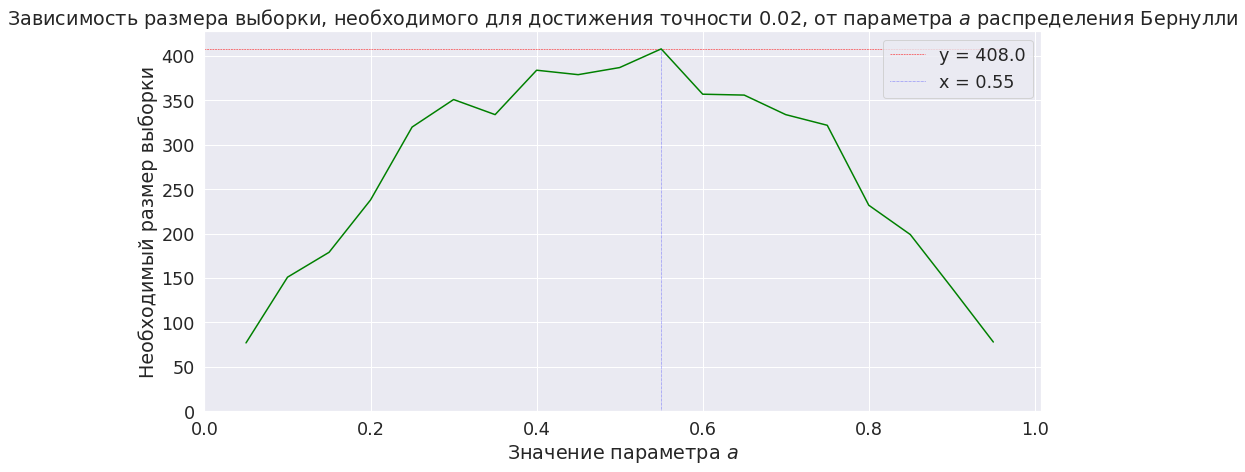

In [ ]:
a_s = np.linspace(0.05, 0.95, 19)

max_value = np.max(good_n_s)

plt.figure(figsize=(15, 7))

plt.plot(a_s, good_n_s, color='green', alpha=1)
plt.hlines(max_value, 0, 0.96, label=f'y = {max_value}', lw=0.5, linestyle='--', colors='red')
plt.vlines(max_arg, 0,  max_value, label=f'x = {max_arg}', lw=0.5, linestyle=':', colors='blue')

plt.xlabel('Значение параметра $a$')
plt.ylabel('Необходимый размер выборки')
plt.legend(loc='best')
plt.xlim(0,)
plt.ylim(0,)
plt.title("Зависимость размера выборки, необходимого для достижения точности $0.02$, от параметра $a$ распределения Бернулли")

**Выводы:**

*1)  показано (см. ""Зависимость функции $F$ от размера выборки (Bern($0.5$)). Линейный масштаб" и "Зависимость функции F от размера выборки (Bern($0.5$)). Логарифмический масштаб" ), что для отдельно взятой выборки с увеличением количества чисел в ней удаётся добиться уменьшения значения функции $F$ на ней, причём быстрого уменьшения.*

*2) показано (см. "Зависимость размера выборки, необходимого для достижения точности $0.02$, от параметра a распределения Бернулли"), что изменяя значение параметра $a$ в распределении Бернулли, можно увеличить или уменьшить размер выборки, достаточный для достижения нужной точности. Эксперимент показал, что самая большая длина выборки требуется на значениях $a$ в окрестности $0.5$.*